# 機械学習スクラッチ SVM

In [2]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.7, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
        self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

【問題1】ラグランジュの未定乗数法による最急降下

In [8]:
import numpy as np
# カーネル関数
def _kernel_function(self, X):
    return np.dot(X, X.T)

# ラムダ更新
def _update_lambda(self, X, y):
    # self._kernel_function dimention:(n_samples, n_samples)
    # np.dot(y, y.T) dimention:(n_samples, n_samples)
    # self.lmd.T dimention:(1, n_samples)
    # self.new_lmd diomention:(n_samples, 1)
    self.X_shape = X.shape
    y = y.reshape(-1, 1)
    tmp = self.lr * (1 - np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))))
    self.new_lmd = (self.new_lmd.T + tmp).reshape(-1, 1)
    self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)

【問題2】サポートベクターの決定

In [10]:
def _decision_support_vector(self):
    # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
    # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
    self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]

In [10]:
# 実験
import numpy as np
a = np.random.rand(10, 2)
b = np.random.rand(10, 2)
# d = np.random.rand(10, 1)
# c = np.concatenate([a, b], axis=1)
# c = np.concatenate([c, d], axis=1)
# c.shape
# print(a, b, c)
print('a', a)
print('b', b)

a [[0.14237474 0.78606796]
 [0.01054916 0.63032926]
 [0.02331546 0.13131144]
 [0.18859862 0.99987759]
 [0.8153332  0.57845916]
 [0.2168577  0.84940776]
 [0.44956827 0.72513224]
 [0.29678255 0.68693074]
 [0.29076148 0.48940262]
 [0.60393363 0.81642163]]
b [[0.64910714 0.70862946]
 [0.26223034 0.21564558]
 [0.12265859 0.58388335]
 [0.46098453 0.21287735]
 [0.72276584 0.18609866]
 [0.34292472 0.96267951]
 [0.7788761  0.67916537]
 [0.40990962 0.68810539]
 [0.94332238 0.306507  ]
 [0.52853012 0.05213654]]


In [9]:
print(a + b)

[[1.20446859]
 [0.89073904]
 [0.96759749]
 [0.80871633]
 [0.84072835]
 [0.01552008]
 [1.24177835]
 [0.58447415]
 [1.23702177]
 [1.64216936]]


In [4]:
print(np.dot(a.T, b))

[[3.46987235]]


In [5]:
print(np.sum(a * b))

3.469872347592294


In [7]:
print(a * b.T)
print((a * b.T).shape)

[[0.31140131 0.33261114 0.29226407 0.31599268 0.17697165 0.21764899
  0.29172581 0.08410118 0.18139199 0.03362506]
 [0.77115476 0.82367883 0.72376328 0.78252484 0.43825291 0.53898636
  0.72243033 0.20826831 0.44919946 0.08326916]
 [0.74138016 0.79187625 0.69581849 0.75231123 0.42133178 0.51817587
  0.694537   0.20022698 0.43185568 0.0800541 ]
 [0.53063485 0.56677689 0.49802458 0.53845865 0.30156368 0.37087879
  0.49710737 0.1433103  0.30909605 0.05729786]
 [0.48554938 0.5186206  0.45570984 0.49270843 0.27594128 0.33936702
  0.45487056 0.13113392 0.28283365 0.05242954]
 [0.62818099 0.67096699 0.589576   0.63744304 0.35699987 0.43905712
  0.58849018 0.16965491 0.3659169  0.06783087]
 [0.19617621 0.20953796 0.18412016 0.19906868 0.11148838 0.13711425
  0.18378107 0.05298196 0.11427311 0.02118307]
 [0.31924424 0.34098827 0.29962502 0.32395125 0.18142885 0.22313069
  0.2990732  0.08621934 0.18596052 0.03447194]
 [0.10608547 0.11331105 0.09956596 0.10764962 0.06028915 0.07414675
  0.09938259

In [16]:
print(np.dot(a, b.T))

[[0.35530385 0.13608867 0.1009748  0.32341987 0.02699235 0.21649186
  0.3560497  0.24544899 0.34548545 0.10616211]
 [0.42599286 0.16316402 0.12106411 0.38776545 0.03236258 0.25956372
  0.42688711 0.29428197 0.41422106 0.12728345]
 [0.16892377 0.06470128 0.04800692 0.15376502 0.0128331  0.10292774
  0.16927838 0.11669496 0.16425577 0.05047315]
 [0.72912588 0.27927019 0.20721234 0.66369616 0.05539153 0.44426713
  0.73065646 0.5036906  0.70897736 0.21785731]
 [0.65805627 0.25204907 0.18701486 0.59900414 0.04999239 0.40096337
  0.65943766 0.4545947  0.63987168 0.19662225]
 [0.7285344  0.27904364 0.20704424 0.66315776 0.05534659 0.44390673
  0.73006374 0.503282   0.70840223 0.21768058]
 [0.56827721 0.21766185 0.1615003  0.5172816  0.04317189 0.34625966
  0.56947014 0.39257404 0.55257355 0.16979694]
 [0.38477688 0.14737745 0.10935082 0.35024807 0.02923141 0.23445021
  0.3855846  0.26580938 0.37414403 0.11496843]
 [0.76232896 0.29198765 0.21664841 0.69391969 0.05791396 0.46449825
  0.76392925

In [15]:
a * b.T

array([[0.35530385, 0.13608867, 0.1009748 , 0.32341987, 0.02699235,
        0.21649186, 0.3560497 , 0.24544899, 0.34548545, 0.10616211],
       [0.42599286, 0.16316402, 0.12106411, 0.38776545, 0.03236258,
        0.25956372, 0.42688711, 0.29428197, 0.41422106, 0.12728345],
       [0.16892377, 0.06470128, 0.04800692, 0.15376502, 0.0128331 ,
        0.10292774, 0.16927838, 0.11669496, 0.16425577, 0.05047315],
       [0.72912588, 0.27927019, 0.20721234, 0.66369616, 0.05539153,
        0.44426713, 0.73065646, 0.5036906 , 0.70897736, 0.21785731],
       [0.65805627, 0.25204907, 0.18701486, 0.59900414, 0.04999239,
        0.40096337, 0.65943766, 0.4545947 , 0.63987168, 0.19662225],
       [0.7285344 , 0.27904364, 0.20704424, 0.66315776, 0.05534659,
        0.44390673, 0.73006374, 0.503282  , 0.70840223, 0.21768058],
       [0.56827721, 0.21766185, 0.1615003 , 0.5172816 , 0.04317189,
        0.34625966, 0.56947014, 0.39257404, 0.55257355, 0.16979694],
       [0.38477688, 0.14737745, 0.1093508

In [399]:
# a = np.random.rand(10, 1)
# b = np.random.rand(10, 1)
# print(np.dot(a, b.T).shape)

In [21]:
# c[c[:, -1] > 0.5]

In [400]:
# c[:, -2].shape

【問題3】推定

In [ ]:
def _predict(self, X):
    y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
    f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
    y_hat = np.sign(f)
    y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
    return y_hat

【問題4】学習と推定

In [11]:
import numpy as np
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=1000, lr=1e-7, kernel='linear', threshold=0.80, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = 1
        self.theta = 0
        self.d = 1
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.base_label = np.unique(y)
        y = np.where(y==self.base_label[0], 1, -1)
            
        self.new_lmd = np.random.rand(X.shape[0], 1)
        for i in range(self.iter):
            self._update_lambda(X, y)
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | max lambda value: {2}'.format(i+1, self.iter, self.new_lmd.max()))
        y = y.reshape(-1, 1)
        tmp = np.concatenate([X, y], axis=1)
        self.combined_all = np.concatenate([tmp, self.new_lmd], axis=1)
        self._decision_support_vector()
        

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        f = self._predict(X)
        return f
    
    # 問題1
    # カーネル関数
    def _kernel_function(self, X):
        # X dimention:(n_samples, n_features)
        # 問題6
        if X.shape[1] <=2:
            return np.dot(X, X.T)
        elif X.shape[1] > 2:
            return (self.gamma * np.dot(X, X.T) + self.theta)**self.d

    # ラムダ更新
    def _update_lambda(self, X, y):
        # self._kernel_function dimention:(n_samples, n_samples)
        # np.dot(y, y.T) dimention:(n_samples, n_samples)
        # self.lmd.T dimention:(1, n_samples)
        # self.new_lmd diomention:(n_samples, 1)
        self.X_shape = X.shape
        y = y.reshape(-1, 1)
        tmp = self.lr * (1 - (np.dot(self.new_lmd.T, np.dot(np.dot(y, y.T), self._kernel_function(X))) - 1.0 * np.dot(self.new_lmd.T, np.dot(y, y.T))).T)
        print(tmp.shape)
        self.new_lmd = (self.new_lmd + tmp).reshape(-1, 1)
        self.new_lmd = np.where(self.new_lmd < 0, 0, self.new_lmd)
        
    def _decision_support_vector(self):
        # self.support_vector dimention:(n, X.shape[1] + y.shape[1] + new_lmd.shape[1]) ※ n < n_samples
        # 推定時にsupport_vectorに紐づいた特徴量やラベル情報を使う為
        self.support_vector = self.combined_all[self.combined_all[:, -1] > self.threshold]
        
    def _predict(self, X):
        y_times_lmd = (self.support_vector[:, -1] * self.support_vector[:, -2]).reshape(-1, 1)
        f = np.dot(np.dot(X, self.support_vector[:, :X.shape[1]].T), y_times_lmd)
        y_hat = np.sign(f)
        y_hat = np.where(y_hat == -1, self.base_label[1], self.base_label[0])
        return y_hat
    

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
iris_data = iris.data[:100, :2]
iris_target = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0)
SS = StandardScaler()
norm_X_train = SS.fit_transform(X_train)
norm_X_test = SS.transform(X_test)

In [13]:
y_train.shape

(80,)

In [14]:
SSVM = ScratchSVMClassifier(verbose=True)
SSVM.fit(norm_X_train, y_train)

(80, 1)
1 / 1000 times done | max lambda value: 0.9624624207236019
(80, 1)
2 / 1000 times done | max lambda value: 0.9624581458570084
(80, 1)
3 / 1000 times done | max lambda value: 0.9624538737159838
(80, 1)
4 / 1000 times done | max lambda value: 0.9624496042988301
(80, 1)
5 / 1000 times done | max lambda value: 0.9624453376038503
(80, 1)
6 / 1000 times done | max lambda value: 0.9624410736293486
(80, 1)
7 / 1000 times done | max lambda value: 0.96243681237363
(80, 1)
8 / 1000 times done | max lambda value: 0.9624325538350006
(80, 1)
9 / 1000 times done | max lambda value: 0.9624282980117678
(80, 1)
10 / 1000 times done | max lambda value: 0.9624240449022398
(80, 1)
11 / 1000 times done | max lambda value: 0.9624197945047259
(80, 1)
12 / 1000 times done | max lambda value: 0.9624155468175367
(80, 1)
13 / 1000 times done | max lambda value: 0.9624113018389835
(80, 1)
14 / 1000 times done | max lambda value: 0.9624070595673788
(80, 1)
15 / 1000 times done | max lambda value: 0.96240282

(80, 1)
253 / 1000 times done | max lambda value: 0.9614670463140563
(80, 1)
254 / 1000 times done | max lambda value: 0.9614634072716344
(80, 1)
255 / 1000 times done | max lambda value: 0.9614597705586589
(80, 1)
256 / 1000 times done | max lambda value: 0.9614561361736789
(80, 1)
257 / 1000 times done | max lambda value: 0.9614525041152437
(80, 1)
258 / 1000 times done | max lambda value: 0.9614488743819041
(80, 1)
259 / 1000 times done | max lambda value: 0.9614452469722113
(80, 1)
260 / 1000 times done | max lambda value: 0.9614416218847179
(80, 1)
261 / 1000 times done | max lambda value: 0.9614379991179771
(80, 1)
262 / 1000 times done | max lambda value: 0.9614343786705429
(80, 1)
263 / 1000 times done | max lambda value: 0.9614307605409705
(80, 1)
264 / 1000 times done | max lambda value: 0.9614271447278159
(80, 1)
265 / 1000 times done | max lambda value: 0.9614235312296359
(80, 1)
266 / 1000 times done | max lambda value: 0.9614199200449881
(80, 1)
267 / 1000 times done | ma

(80, 1)
527 / 1000 times done | max lambda value: 0.9605523519872587
(80, 1)
528 / 1000 times done | max lambda value: 0.9605492998754313
(80, 1)
529 / 1000 times done | max lambda value: 0.9605462497273889
(80, 1)
530 / 1000 times done | max lambda value: 0.9605432015419083
(80, 1)
531 / 1000 times done | max lambda value: 0.9605401553177667
(80, 1)
532 / 1000 times done | max lambda value: 0.9605371110537423
(80, 1)
533 / 1000 times done | max lambda value: 0.9605340687486138
(80, 1)
534 / 1000 times done | max lambda value: 0.9605310284011608
(80, 1)
535 / 1000 times done | max lambda value: 0.9605279900101636
(80, 1)
536 / 1000 times done | max lambda value: 0.9605249535744036
(80, 1)
537 / 1000 times done | max lambda value: 0.9605219190926624
(80, 1)
538 / 1000 times done | max lambda value: 0.9605188865637226
(80, 1)
539 / 1000 times done | max lambda value: 0.9605158559863679
(80, 1)
540 / 1000 times done | max lambda value: 0.9605128273593821
(80, 1)
541 / 1000 times done | ma

(80, 1)
807 / 1000 times done | max lambda value: 0.959769912239139
(80, 1)
808 / 1000 times done | max lambda value: 0.9597673608947044
(80, 1)
809 / 1000 times done | max lambda value: 0.9597648111763285
(80, 1)
810 / 1000 times done | max lambda value: 0.9597622630830148
(80, 1)
811 / 1000 times done | max lambda value: 0.9597597166137675
(80, 1)
812 / 1000 times done | max lambda value: 0.959757171767591
(80, 1)
813 / 1000 times done | max lambda value: 0.9597546285434906
(80, 1)
814 / 1000 times done | max lambda value: 0.9597520869404722
(80, 1)
815 / 1000 times done | max lambda value: 0.9597495469575423
(80, 1)
816 / 1000 times done | max lambda value: 0.959747008593708
(80, 1)
817 / 1000 times done | max lambda value: 0.9597444718479768
(80, 1)
818 / 1000 times done | max lambda value: 0.9597419367193573
(80, 1)
819 / 1000 times done | max lambda value: 0.9597394032068581
(80, 1)
820 / 1000 times done | max lambda value: 0.959736871309489
(80, 1)
821 / 1000 times done | max la

(80, 1)
931 / 1000 times done | max lambda value: 0.9594656424375966
(80, 1)
932 / 1000 times done | max lambda value: 0.9594632853105095
(80, 1)
933 / 1000 times done | max lambda value: 0.9594609296904494
(80, 1)
934 / 1000 times done | max lambda value: 0.9594585755764927
(80, 1)
935 / 1000 times done | max lambda value: 0.9594562229677164
(80, 1)
936 / 1000 times done | max lambda value: 0.959453871863198
(80, 1)
937 / 1000 times done | max lambda value: 0.9594515222620155
(80, 1)
938 / 1000 times done | max lambda value: 0.9594491741632475
(80, 1)
939 / 1000 times done | max lambda value: 0.9594468275659733
(80, 1)
940 / 1000 times done | max lambda value: 0.9594444824692727
(80, 1)
941 / 1000 times done | max lambda value: 0.959442138872226
(80, 1)
942 / 1000 times done | max lambda value: 0.959439796773914
(80, 1)
943 / 1000 times done | max lambda value: 0.9594374561734182
(80, 1)
944 / 1000 times done | max lambda value: 0.9594351170698208
(80, 1)
945 / 1000 times done | max l

In [5]:
SSVM.combined_all[:, -1]

array([0.96051099, 0.28368627, 0.64945306, 0.96747736, 0.48296484,
       0.67204559, 0.62639943, 0.9837701 , 0.97562668, 0.79109783,
       0.28770589, 0.531416  , 0.6367688 , 0.48809836, 0.26433508,
       0.41831099, 0.75939083, 0.60446111, 0.77362352, 0.2502673 ,
       0.64146604, 0.48447544, 0.28937381, 0.35166417, 0.11083769,
       0.65532658, 0.30473154, 0.08209109, 0.58006775, 0.8744723 ,
       0.02730969, 0.8116076 , 0.8447356 , 0.90971067, 0.77631656,
       0.06434058, 0.5771694 , 0.8279554 , 0.54850474, 0.48667272,
       0.54078036, 0.11765074, 0.84973822, 0.16750058, 0.45047602,
       0.64949643, 0.0542049 , 0.64235351, 0.661992  , 0.84822207,
       0.7595624 , 0.11525156, 0.86600899, 0.47180879, 0.81680557,
       0.16859153, 0.19646439, 0.66939661, 0.29000641, 0.36169742,
       0.10200883, 0.71757652, 0.70925475, 0.9870851 , 0.74907028,
       0.58629197, 0.80574154, 0.27062696, 0.63128808, 0.58406691,
       0.33707381, 0.56782622, 0.70629173, 0.13623672, 0.60779

In [6]:
len(SSVM.support_vector)

15

In [7]:
pred = SSVM.predict(norm_X_test)
pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


【問題5】決定領域の可視化

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.support_vector[:,0], model.support_vector[:, 1], s=80, color='yellow', label='SV', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

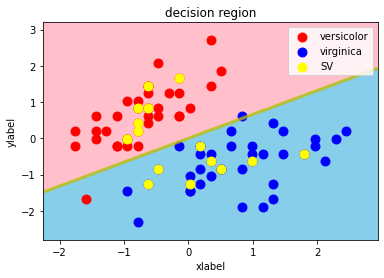

In [10]:
decision_region(norm_X_train, y_train, SSVM)

In [47]:
from sklearn.svm import SVC

In [246]:
svm = SVC(C=1, kernel='linear')
svm.fit(norm_X_train, y_train)
true_pred = svm.predict(norm_X_test)

In [247]:
accuracy = metrics.accuracy_score(y_test, true_pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, true_pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, true_pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, true_pred)
print('F値: {}'.format(f_value))

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


In [248]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=80, color='yellow', label='SV', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

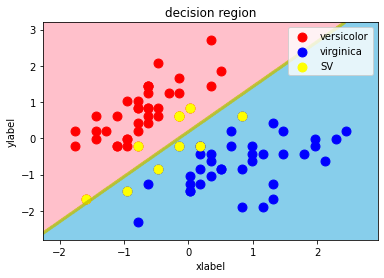

In [249]:
decision_region2(norm_X_train, y_train, svm)

【問題6】（アドバンス課題）多項式カーネル関数の作成

In [ ]:
# カーネル関数
def _kernel_function(self, X):
    # X dimention:(n_samples, n_features)
    if X.shape[1] <=2:
        return np.dot(X, X.T)
    elif X.shape[1] > 2:
        return (self.gamma * np.dot(X, X.T) + self.theta)**self.d